# Helicopter experiment

### Xander Mol, December 2020

### Reading datafile

In [18]:
#Imports
import pandas as pd
import seaborn as sns

In [19]:
#Reading data and previewing data
flightdata=pd.read_csv('Xander Mol Helicopter Experiment data.csv', index_col=0)
flightdata

,PAPERCOLOR,PAPERCLIPS,FLIGHTTIME
OBSERVATION,,,
1,Y,0,1.32
2,Y,0,1.61
3,Y,0,1.25
4,Y,0,1.32
5,B,0,2.56
6,B,0,2.23
7,B,0,2.12
8,B,0,2.30
9,R,0,1.22


### Analysing data

In [20]:
flightdata.describe()

,PAPERCLIPS,FLIGHTTIME
count,36.000000,36.000000
mean,1.000000,1.784444
std,0.828079,0.352594
min,0.000000,1.220000
25%,0.000000,1.530000
50%,1.000000,1.680000
75%,2.000000,2.122500
max,2.000000,2.560000


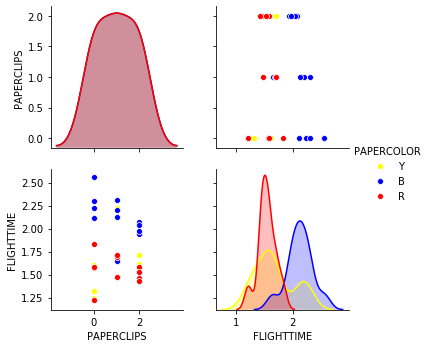

In [22]:
palette ={"Y": "yellow", "B": "blue", "R": "red"}
sns.pairplot(flightdata, hue="PAPERCOLOR", palette = palette)

### One hot encoding of paper color

In [26]:
#One hot encoding of paper color
flightdata_onehot = pd.get_dummies(flightdata[['PAPERCOLOR']], prefix="", prefix_sep="")
flightdata_onehot['PAPERCLIPS'] = flightdata['PAPERCLIPS']
flightdata_onehot['FLIGHTTIME'] = flightdata['FLIGHTTIME']
flightdata_onehot

,B,R,Y,PAPERCLIPS,FLIGHTTIME
OBSERVATION,,,,,
1,0,0,1,0,1.32
2,0,0,1,0,1.61
3,0,0,1,0,1.25
4,0,0,1,0,1.32
5,1,0,0,0,2.56
6,1,0,0,0,2.23
7,1,0,0,0,2.12
8,1,0,0,0,2.30
9,0,1,0,0,1.22
